In [177]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [178]:
dataset = pd.read_csv('Data.csv')
dataset.head()

,f1,f2,f3,f4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [196]:
dataset.shape

(150, 5)

In [179]:
dataset.describe()

,f1,f2,f3,f4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [180]:
class KMeans:
    
    def __init__(self, k):
        self.k = k
        self.centroids = pd.DataFrame()
        self.clusters = np.ndarray(1)
        self.old_centroids = pd.DataFrame()

    def fit(self, X):
        self.data = X.copy(deep=True)
        self.clusters = np.zeros(len(self.data))

        # Randomly initialize centroids
        unique_rows = self.data.drop_duplicates()
        unique_rows.reset_index(drop=True, inplace=True)
        self.centroids = unique_rows.sample(n=self.k)
        self.centroids.reset_index(drop=True, inplace=True)


        # Initialize old centroids as a matrix of all 0's
        self.old_centroids = pd.DataFrame(np.zeros(shape=(self.k, self.data.shape[1])),
                                          columns=self.data.columns)

        # Compare every data point in our dataset to each of the k-means and assign each point to closest cluster
        while not self.old_centroids.equals(self.centroids):
            # Stash old centroids
            self.old_centroids = self.centroids.copy(deep=True)

            # Iterate through each data point in the matrix
            for row_i in range(0, len(self.data)):
                distances = list()
                point = self.data.iloc[row_i]
                # Calculate the distance between the current point and each of the centroids
                for row_c in range(0, len(self.centroids)):
                    centroid = self.centroids.iloc[row_c]
                    distances.append(np.linalg.norm(point - centroid))

                # Assign this data point to a cluster
                self.clusters[row_i] = np.argmin(distances)

            # For each cluster extract the values which now belong to each cluster and calculate new k-means
            for cls in range(0, self.k):

                cls_idx = np.where(self.clusters == cls)[0]

                if len(cls_idx) == 0:
                    self.centroids.loc[cls] = self.old_centroids.loc[cls]
                else:
                    # Set the new k-mean to the mean value of the data points within this cluster
                    self.centroids.loc[cls] = self.data.iloc[cls_idx].mean()
                    

In [181]:
# Run
kmeans = KMeans(k=3)
kmeans.fit(dataset)

In [198]:
# Extraction of the results
dataset['cluster'] = kmeans.clusters
centroids = kmeans.centroids
centroids['cluster'] = 'centroid'
New_dataset = pd.concat([dataset, centroids])

/Users/arnaud/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


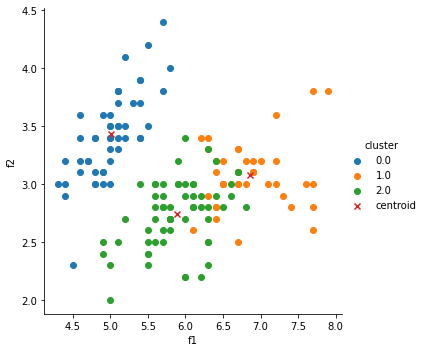

In [183]:
# Plot the cluster centroids for f1 and f2
sns.FacetGrid(New_dataset, hue="cluster", size=5, hue_kws={"marker":["o", "o", "o", "x"]}).map(plt.scatter, "f1", "f2").add_legend()

/Users/arnaud/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


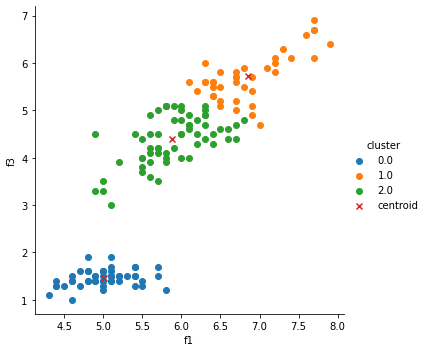

In [184]:
# Plot the cluster centroids for f1 and f3
sns.FacetGrid(New_dataset, hue="cluster", size=5, hue_kws={"marker":["o", "o", "o", "x"]}).map(plt.scatter, "f1", "f3").add_legend()

/Users/arnaud/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


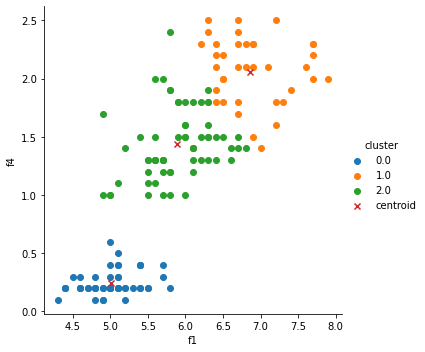

In [185]:
# Plot the cluster centroids for f1 and f4
sns.FacetGrid(New_dataset, hue="cluster", size=5, hue_kws={"marker":["o", "o", "o", "x"]}).map(plt.scatter, "f1", "f4").add_legend()

/Users/arnaud/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


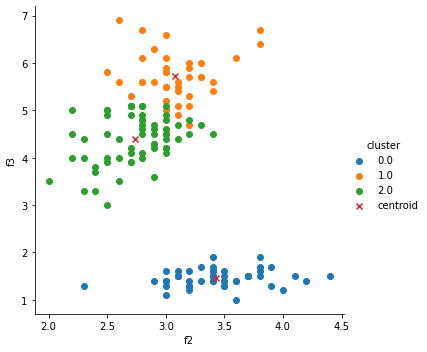

In [186]:
# Plot the cluster centroids for f2 and f3
sns.FacetGrid(New_dataset, hue="cluster", size=5, hue_kws={"marker":["o", "o", "o", "x"]}).map(plt.scatter, "f2", "f3").add_legend()

/Users/arnaud/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


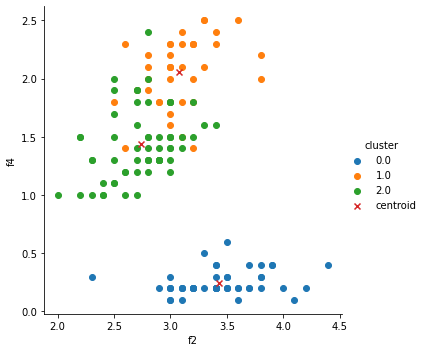

In [187]:
# Plot the cluster centroids for f2 and f4
sns.FacetGrid(New_dataset, hue="cluster", size=5, hue_kws={"marker":["o", "o", "o", "x"]}).map(plt.scatter, "f2", "f4").add_legend()

/Users/arnaud/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


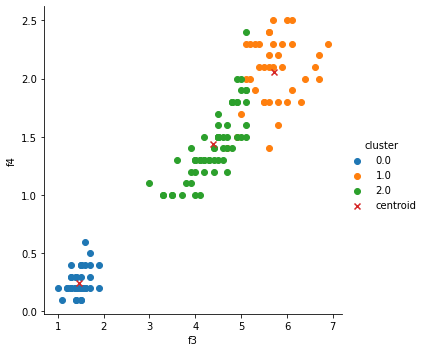

In [188]:
# Plot the cluster centroids for f3 and f4
sns.FacetGrid(New_dataset, hue="cluster", size=5, hue_kws={"marker":["o", "o", "o", "x"]}).map(plt.scatter, "f3", "f4").add_legend()

In [199]:
class PCA:
    
    def __init__(self, number_components):
        self.number_components = number_components
        self.components = None
        self.mean = None
        self.std = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        X = (X - self.mean)/self.std
        # covariance, function needs samples as columns
        cov = np.cov(X.T)
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        Sort = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[Sort]
        eigenvectors = eigenvectors[Sort]
        # store first n eigenvectors
        self.components = eigenvectors[0:self.number_components]

    def transform(self, X):
        # project data
        X = (X - self.mean)/self.std
        return np.dot(X, self.components.T)
    
    def plot(self, X):
        X1 = X[:,0]
        X2 = X[:,1]
        plt.scatter(X1, X2,
                     edgecolor='none', alpha=0.8,
                    cmap=plt.cm.get_cmap('viridis', 2))
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar()
        plt.show()

In [200]:
pca = PCA(2)
pca.fit(dataset)
X_projected = pca.transform(dataset)
X_projected

array([[ 2.6109728 ,  0.33790365],
       [ 2.36676883, -0.61186889],
       [ 2.64316085, -0.40399912],
       [ 2.5668063 , -0.60955255],
       [ 2.73430875,  0.44664067],
       [ 2.50969899,  1.26137256],
       [ 2.74041107, -0.09209801],
       [ 2.56433838,  0.12274593],
       [ 2.56269783, -1.06868083],
       [ 2.47366456, -0.46232537],
       [ 2.56187045,  0.85504441],
       [ 2.6410399 ,  0.01632524],
       [ 2.48647039, -0.69669166],
       [ 2.84168488, -1.01556692],
       [ 2.6485629 ,  1.55853004],
       [ 2.76013239,  2.24994902],
       [ 2.62857948,  1.22295543],
       [ 2.54448207,  0.36471392],
       [ 2.34643212,  1.24185022],
       [ 2.72513732,  0.87456675],
       [ 2.29205483,  0.37400443],
       [ 2.58852146,  0.73462751],
       [ 3.06603255,  0.17617361],
       [ 2.18208998,  0.1136483 ],
       [ 2.55187953,  0.04513809],
       [ 2.25411776, -0.53464784],
       [ 2.40163679,  0.18597077],
       [ 2.52804185,  0.40552041],
       [ 2.48763685,

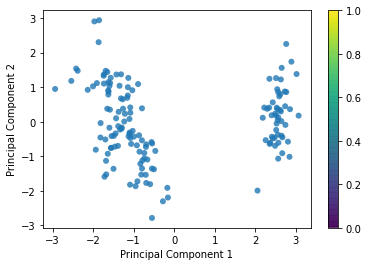

In [201]:
pca.plot(X_projected)

## Thank you